In [3]:
import pandas as pd
from scipy.io.arff import loadarff
# from matplot import pyplot as plt
import numpy as np
import seaborn as sns

In [45]:
raw_data = loadarff('dataset_38_sick.arff')
df_data = pd.DataFrame(raw_data[0])
a = df_data.head(2)
print(df_data)

       age   sex on_thyroxine query_on_thyroxine on_antithyroid_medication  \
0     41.0  b'F'         b'f'               b'f'                      b'f'   
1     23.0  b'F'         b'f'               b'f'                      b'f'   
2     46.0  b'M'         b'f'               b'f'                      b'f'   
3     70.0  b'F'         b't'               b'f'                      b'f'   
4     70.0  b'F'         b'f'               b'f'                      b'f'   
...    ...   ...          ...                ...                       ...   
3767  30.0  b'F'         b'f'               b'f'                      b'f'   
3768  68.0  b'F'         b'f'               b'f'                      b'f'   
3769  74.0  b'F'         b'f'               b'f'                      b'f'   
3770  72.0  b'M'         b'f'               b'f'                      b'f'   
3771  64.0  b'F'         b'f'               b'f'                      b'f'   

      sick pregnant thyroid_surgery I131_treatment query_hypoth

In [46]:
df_data = df_data.dropna(subset=['TT4', 'FTI', 'age', 'sick', 'T4U'])
# df_data = df_data['sick'].dropna()
print(df_data)

       age   sex on_thyroxine query_on_thyroxine on_antithyroid_medication  \
0     41.0  b'F'         b'f'               b'f'                      b'f'   
2     46.0  b'M'         b'f'               b'f'                      b'f'   
4     70.0  b'F'         b'f'               b'f'                      b'f'   
5     18.0  b'F'         b't'               b'f'                      b'f'   
6     59.0  b'F'         b'f'               b'f'                      b'f'   
...    ...   ...          ...                ...                       ...   
3766  19.0  b'F'         b'f'               b'f'                      b'f'   
3768  68.0  b'F'         b'f'               b'f'                      b'f'   
3769  74.0  b'F'         b'f'               b'f'                      b'f'   
3770  72.0  b'M'         b'f'               b'f'                      b'f'   
3771  64.0  b'F'         b'f'               b'f'                      b'f'   

      sick pregnant thyroid_surgery I131_treatment query_hypoth

In [55]:
df_data = df_data[df_data['T4U'] > 1]
df_data = df_data[df_data['FTI'] > 100]
df_data = df_data[df_data['age'] > 50]
df_data = df_data[df_data['age'] < 65]
# df_data = df_data[df_data['sick'] == True]

<AxesSubplot: xlabel='sick', ylabel='age'>

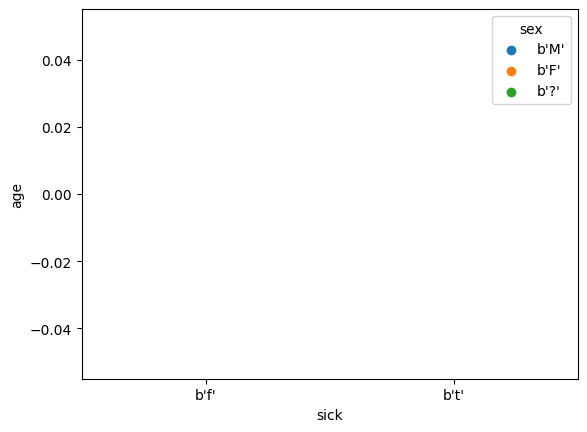

In [56]:
sns.stripplot(x="sick", y="age", hue='sex', data=df_data, linewidth=1)

<AxesSubplot: xlabel='age', ylabel='sick'>

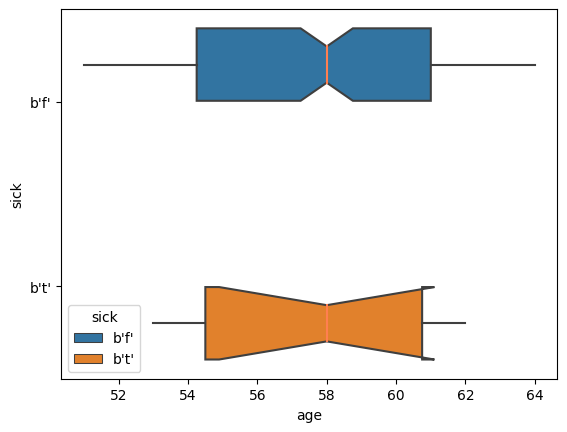

In [57]:
sns.boxplot(data=df_data, x='age', y='sick', hue="sick", notch=True, showcaps=False,medianprops={"color": "coral"}, showfliers=False)